In [25]:
%load_ext autoreload
%autoreload 2

import os 
import sys
sys.path.append("../")

from vector_graph.bipartite_graph_networkx import BipartiteGraphNetworkx
from vector_graph.bipartite_graph_dict import BipartiteGraphDict
from utils.parse_arxiv import make_keyword_id, parse_authors, parse_categories

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# Setup the Data
data_ids = ["A", "B", "C", "D"]
categories = ["1", "2", "3", "4"]
values = categories
keyword_ids = []
for i in range(len(categories)):
    keyword_ids.append(make_keyword_id(categories[i], values[i]))

In [27]:
# Put the data in the graph
G = BipartiteGraphNetworkx()
G.add_data_nodes(data_ids)
G.add_keyword_nodes(keyword_ids)
G.add_edges(
    ["A", "A", "B", "B", "B", "C", "D", "C"],
    ["1:1", "2:2", "1:1", "2:2", "3:3", "4:4", "4:4", "3:3"],
)

[('A', '1:1'), ('A', '2:2'), ('B', '1:1'), ('B', '2:2'), ('B', '3:3'), ('C', '4:4'), ('D', '4:4'), ('C', '3:3')]


True


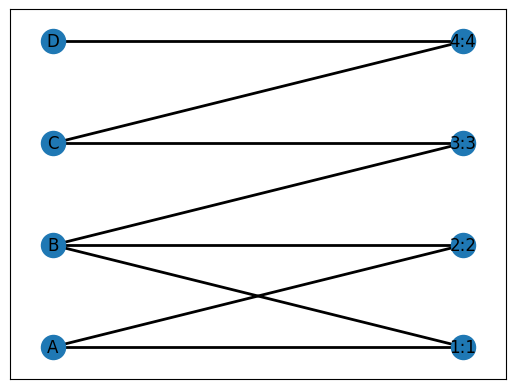

In [28]:
# Print the graph
print(G.is_bipartite())
G.draw_graph()

In [29]:
# Put the data in the graph
G_Dict = BipartiteGraphDict()
G_Dict.add_data_nodes(data_ids)
G_Dict.add_keyword_nodes(keyword_ids)
G_Dict.add_edges(
    ["A", "A", "B", "B", "B", "C", "D", "C"],
    ["1:1", "2:2", "1:1", "2:2", "3:3", "4:4", "4:4", "3:3"],
)
print(G_Dict.find_relevant(["A", "C"], 6))

num search rounds: 2
['B', 'D']


In [32]:
# Perform a Simple Test
print("Num data points: ", len(data_ids))

query_list = G_Dict.get_data_ids_sorted_by_num_edges()[:1]
print(query_list)
most_relevant_res = G_Dict.find_relevant(query_list, 100, method="debug")
print(len(most_relevant_res))
# add metadata to most_relevant res results so that can see keywords in common with query, keywords and nodes traversed to find result
print(most_relevant_res)
print(G_Dict.get_keyword_totals_of_id_list(most_relevant_res))

Num data points:  4
['B']
num search rounds: 3
A, keywords shared with input:[('2:2', 1), ('1:1', 1)] discovery chain: ['A', '1:1', 'B']
C, keywords shared with input:[('3:3', 1)] discovery chain: ['C', '3:3', 'B']
D, keywords shared with input:[] discovery chain: ['D', '4:4', 'C', '3:3', 'B']
3
['A', 'C', 'D']
[('4:4', 2), ('2:2', 1), ('1:1', 1), ('3:3', 1)]
